## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print('\033[1m' + '% of Non-fraudulent Transaction:',round(normal_share,3))
print('\033[1m' + '% of Fraudulent Transaction:',round(fraud_share,3))

% of Non-fraudulent Transaction: 99.827
% of Fraudulent Transaction: 0.173


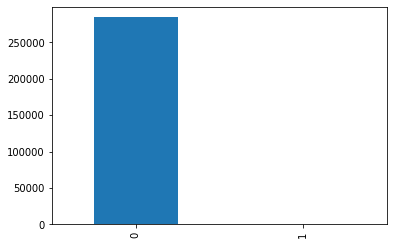

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

df['Class'].value_counts().plot(kind = 'bar')

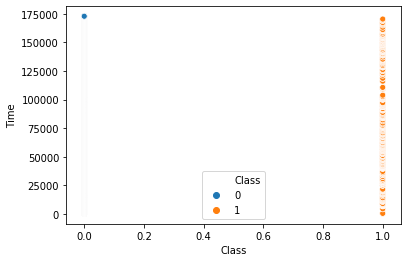

In [6]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(y=df.Time, x=df.Class, hue=df.Class)

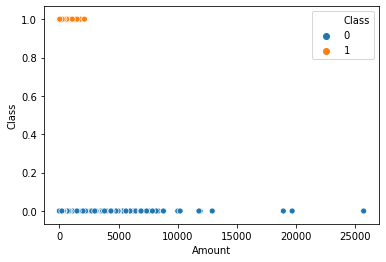

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=df.Amount, y=df.Class, hue=df.Class)

In [8]:
# Drop unnecessary columns
df = df.drop('Time', axis=1)
df_copy = df.copy()

### Splitting the data into train & test data

In [9]:
y= df.Class  #class variable

X = df.drop('Class', axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, stratify = y, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [11]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


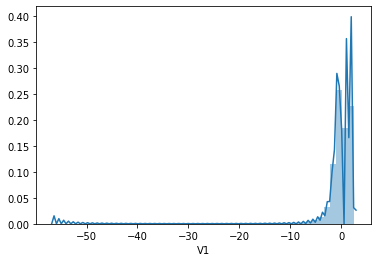

In [12]:
# plot the histogram of a variable from the dataset to see the skewness
sns.distplot(df.V1)

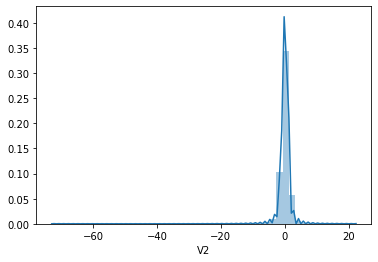

In [13]:
# plot the histogram of a variable from the dataset to see the skewness
sns.distplot(df.V2)

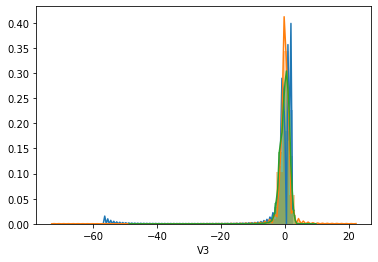

In [14]:
fet=['V1','V2','V3']
for i in fet:
  sns.distplot(df[i])

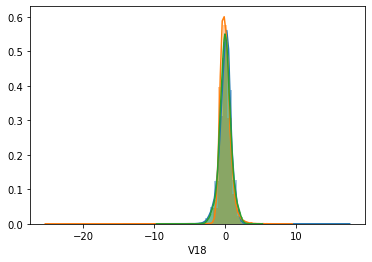

In [15]:
fet=['V16','V17','V18']
for i in fet:
  sns.distplot(df[i])

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy = False)
pt.fit_transform(X_train)
pt.transform(X_test)

array([[-1.3219147 ,  1.32104187, -0.68354035, ..., -0.4448339 ,
        -0.24728806,  0.33284735],
       [-0.40195518,  0.70033947, -0.0056943 , ...,  0.34754881,
         0.42901454, -0.47190914],
       [ 0.12179853, -1.47928504, -0.83588928, ..., -0.24888141,
         0.28212126,  1.94680256],
       ...,
       [ 1.48502918, -0.64373063, -1.06687013, ..., -0.14916882,
        -0.15772833,  0.72358456],
       [ 0.71520254, -0.02015591, -0.29804278, ..., -0.11903965,
         0.02035731, -1.27117686],
       [ 1.61159573, -0.44383285, -0.90296892, ..., -0.1523038 ,
        -0.17657672, -0.16240034]])

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


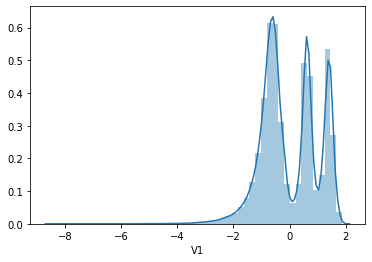

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
sns.distplot(X_train.V1)

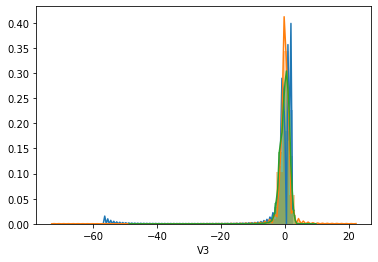

In [18]:
fet=['V1','V2','V3']
for i in fet:
  sns.distplot(df[i])

## Model Building on Imbalanced Data
- Build different models on the imbalanced dataset and see the result

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.metrics import roc_auc_score

num_C = [20,40,50,60]  #--> list of values


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Logistic Regression  Without Balancing 


In [25]:
for i in num_C:
    lr_2 = LogisticRegression(C=i, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=1000, verbose=0,
                   warm_start=False)
    lr_2.fit(X_train, y_train)
    y_pred_os = lr_2.predict_proba(X_test)
    print('C : ',i,' ROC Score ',roc_auc_score(y_test, y_pred_os[:,1]))

C :  20  ROC Score  0.965492733486168
C :  40  ROC Score  0.9654894064003625
C :  50  ROC Score  0.9654891687513762
C :  60  ROC Score  0.965489010318719


### Random Forest Without Balancing 

In [ ]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [1,2,4,8,10],
          'n_estimators': [100,200, 300]}
folds = 5
RF = RandomForestClassifier()
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1)  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 68.4min finished


2 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 68.6min finished


3 of KFold 3
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 65.4min finished


0.8931033916842956
{'max_depth': 10, 'n_estimators': 100}


In [ ]:
#perform cross validation 
# Running 1 more iteration for finding best parm as we got the border values 
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [10,12,15],
          'n_estimators': [50,70,100]}
folds = 5

i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1)  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)   
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters

print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.3min finished


2 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.7min finished


3 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.4min finished


0.8969267804044431
{'max_depth': 12, 'n_estimators': 100}


##### Optimal Model: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
clf = RandomForestClassifier(n_jobs=-1,max_depth=12,n_estimators=100)  
clf.fit(X_train, y_train)
y_pred_un = clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.975681683759604


### XGBOOST without Balancing  

In [ ]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=3)
i=1
for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]


    #perform hyperparameter tuning
    param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


    # specify model
    xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = xgb_model, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1
#print the evaluation result by choosing a evaluation metric
y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
#print the optimum value of hyperparameters
print(model_cv.best_params_)

1 of KFold 3
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.3min finished


2 of KFold 3
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.1min finished


3 of KFold 3
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.3min finished


0.8930967968572779
{'learning_rate': 0.2, 'subsample': 0.9}


##### Optimal model: XGBoost

In [30]:
clf = XGBClassifier(max_depth=2, n_estimators=200,learning_rate = 0.2, subsample = 0.9,objective = 'binary:logistic')  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
y_pred_un = clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9696312717547844


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


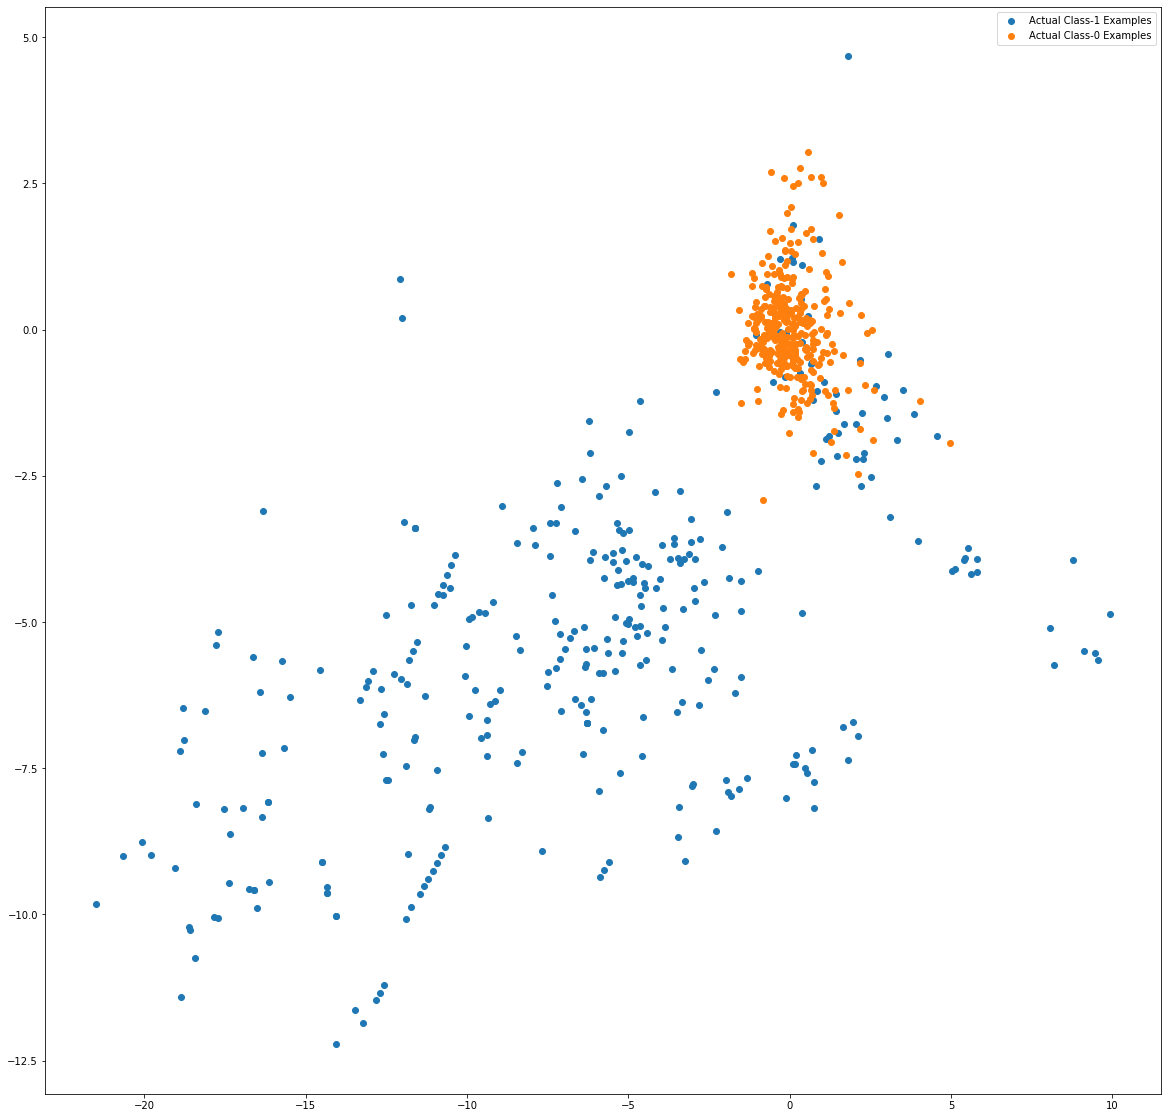

In [31]:
# Printing IMP features for the best model we got ie XGB(Clf)
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

## Model Building: Random Oversampling

### Logistic Regresion With Balancing 

In [34]:
# Logistic Regression
from sklearn import linear_model #import the package
import warnings
warnings.filterwarnings("ignore")

num_C = [0.01,0.1,20,30,100] 
from sklearn.metrics import roc_auc_score
for i in num_C:
    
    lr_1 = LogisticRegression(C=i,penalty='l2', solver='lbfgs', 
                          class_weight='balanced',max_iter=1000,
                          random_state=1000, tol=0.0001, verbose=0)
    lr_1.fit(X_train, y_train)
    y_pred_l1 = lr_1.predict(X_test)
    print("C",i,"ROC AUC: ",roc_auc_score(y_test, y_pred_l1))

C 0.01 ROC AUC:  0.9278344790655009
C 0.1 ROC AUC:  0.9274124144661693
C 20 ROC AUC:  0.927271726266392
C 30 ROC AUC:  0.927271726266392
C 100 ROC AUC:  0.927271726266392


### Random Forest with Balancing

In [ ]:
from imblearn import over_sampling     #- import the packages

## We are using Gridserach CV to check accuracy accross below combination and we will be building  our final model on the best found parm
## we will be checking performance on max depth 4, 8 and 10 and estimators of 100 , 200 & 300 

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits=3)
param_grid = {'max_depth': [4,8,10],
          'n_estimators': [100,200, 300]}
folds = 5
i=1
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

for train_index,test_index in skf.split(X_train,y_train):
    print('{} of KFold {}'.format(i,skf.n_splits))
    X_train_cv,X_test_cv = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_cv,y_test_cv = y_train.iloc[train_index],y_train.iloc[test_index]

    # specify model
    RF = RandomForestClassifier(n_jobs=-1,class_weight='balanced')  

    # set up GridSearchCV()
    model_cv = GridSearchCV(estimator = RF, 
                            param_grid = param_grid, 
                            scoring= 'roc_auc', 
                            cv = StratifiedKFold(n_splits=5, shuffle=True), 
                            verbose = 2,
                            n_jobs=-1,
                            return_train_score=True)  
    
    model_cv.fit(X_train_cv, y_train_cv)
    i+=1

#print the evaluation result by choosing a evaluation metric

y_pred = model_cv.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))

#print the optimum value of hyperparameters

print(model_cv.best_params_)



1 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.1min finished


2 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.7min finished


3 of KFold 3
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 37.4min finished


0.9331030815763992
{'max_depth': 4, 'n_estimators': 200}


##### Optimal Model:  Random Forest with Balancing

In [ ]:
clf1 = RandomForestClassifier(n_jobs=-1,max_depth=4,n_estimators=200,class_weight='balanced')  
clf1.fit(X_train, y_train)
y_pred_un = clf1.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9740935766540718


### XGBoost with Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler #- import the packages
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_cv, y_train_cv = ros.fit_resample(X_train, y_train)
X_test_cv, y_test_cv = ros.fit_resample(X_test, y_test)

#perform hyperparameter tuning
param_grid = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_depth' : [2,3,5]
          }          

# specify model
xgb_model_os = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv_os = GridSearchCV(estimator = xgb_model_os, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)  
model_cv_os.fit(X_train_cv, y_train_cv)
#print the evaluation result by choosing a evaluation metric
y_pred = model_cv_os.predict(X_test_cv)
print(roc_auc_score(y_test_cv, y_pred))
#print the optimum value of hyperparameters
print(model_cv_os.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 56.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 141.7min finished


0.930069991558807
{'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.3}


##### Optimal Model: XGBoost with Random Oversampling

In [36]:
clf_os = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.2, subsample = 0.3,objective = 'binary:logistic')  #initialise the model with optimum hyperparameters
clf_os.fit(X_train_cv, y_train_cv)
y_pred_os = clf_os.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_os[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9730071152106441


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 4
3rd Top var = 12


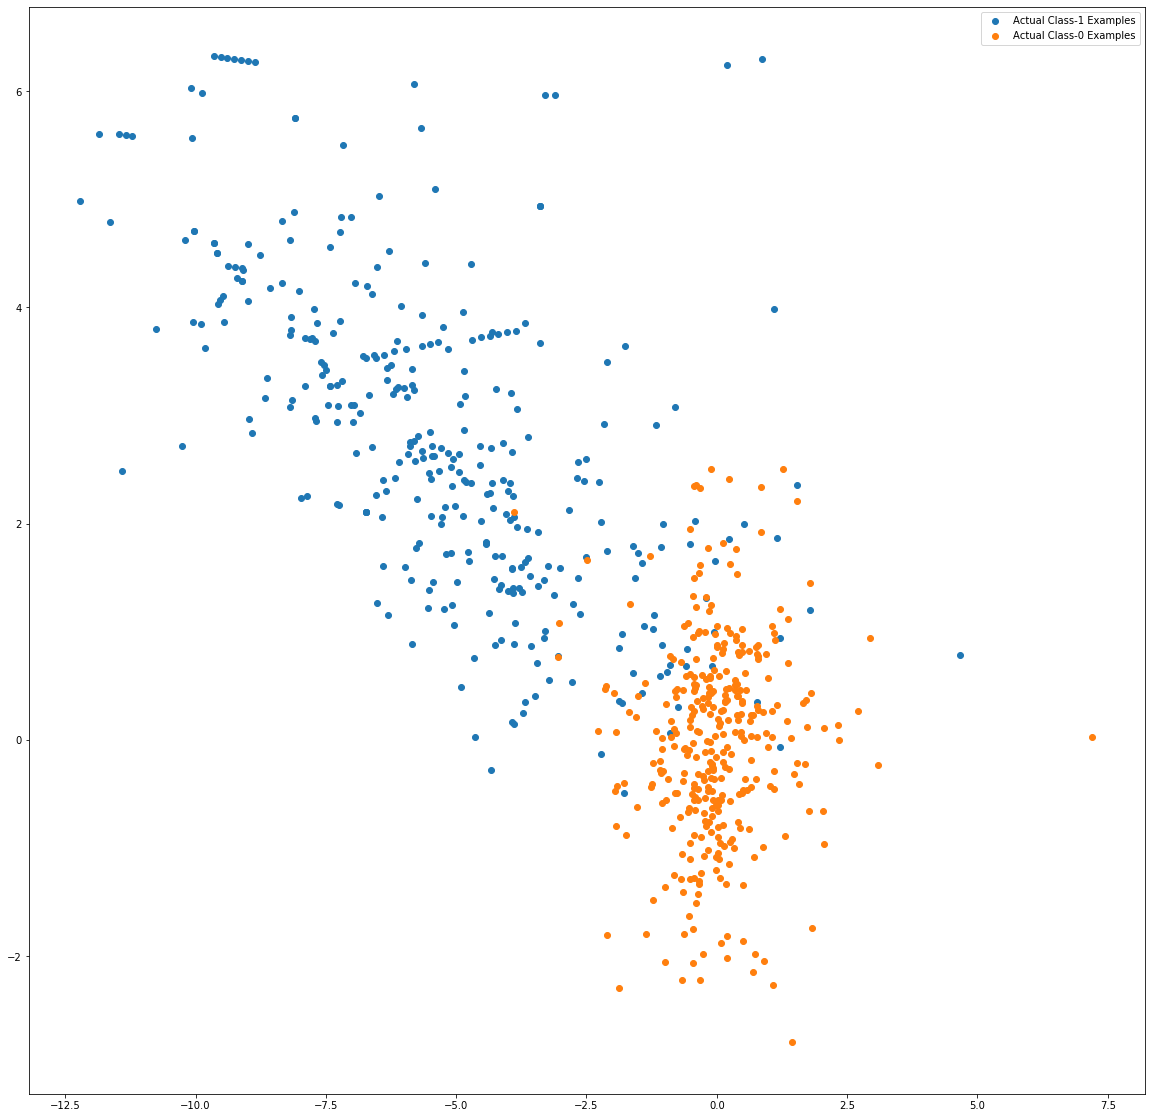

In [37]:
var_imp = []
for i in clf_os.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_os.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_os.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_os.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_os.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_os.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model Building: SMOTE 

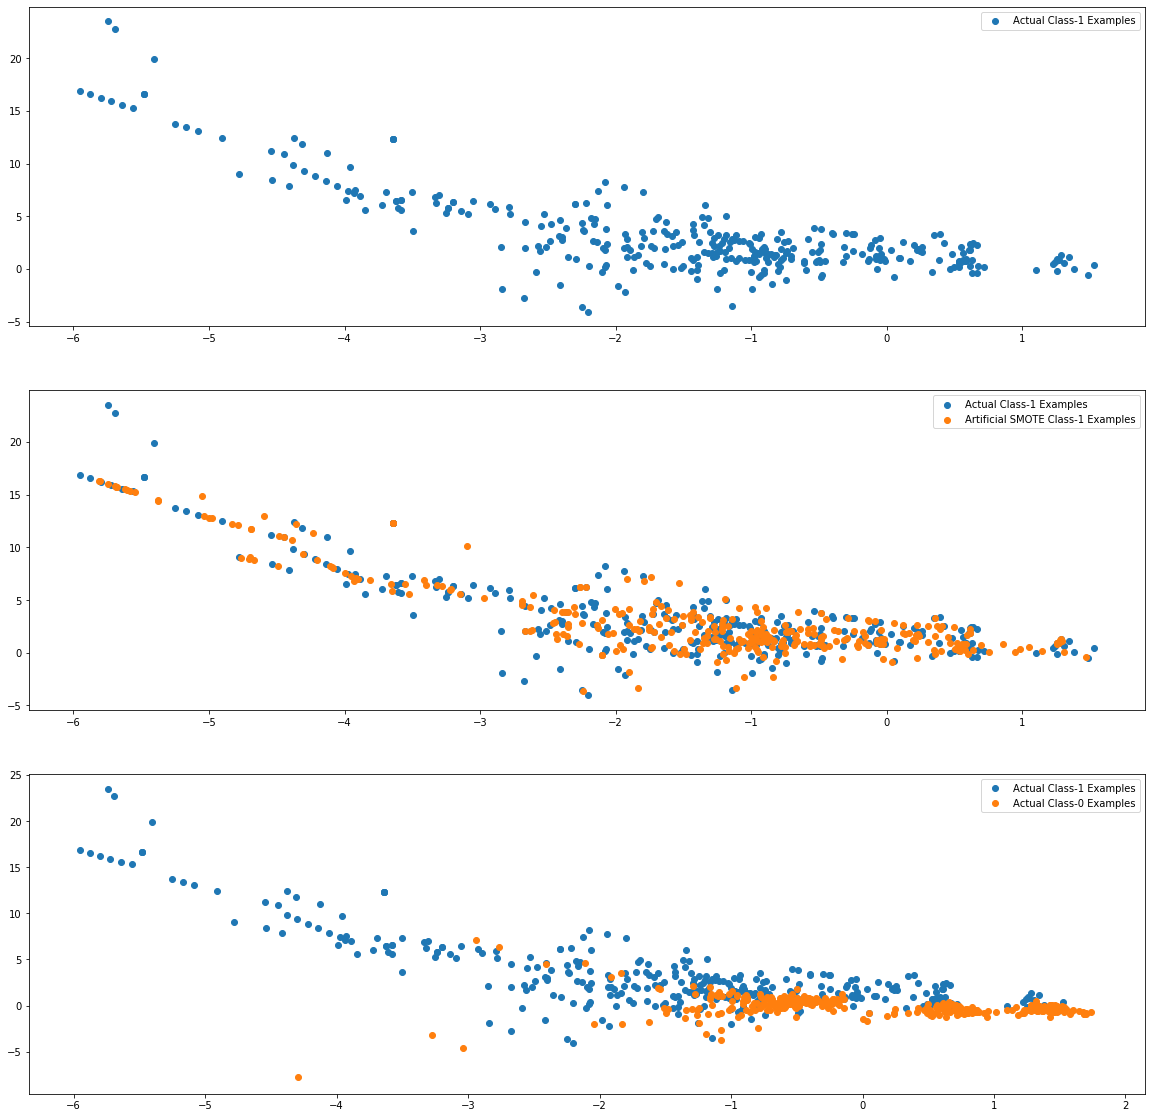

In [23]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression With SMOTE 

In [24]:
for i in num_C:
    lr_sm = LogisticRegression(C=i, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=1000, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
    lr_sm.fit(X_train_smote, y_train_smote)
    y_pred_os = lr_sm.predict_proba(X_test)
    print('C : ',i,' ROC Score ',roc_auc_score(y_test, y_pred_os[:,1])) 

C :  0.01  ROC Score  0.9685893789915127
C :  0.1  ROC Score  0.9681751568087227
C :  20  ROC Score  0.9681190320398363
C :  30  ROC Score  0.9681183983092065
C :  100  ROC Score  0.9681182398765492


### XGBoost with SMOTE 

In [18]:
from imblearn.over_sampling import SMOTE #- import the packages
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#perform hyperparameter tuning
param_grid = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_depth' : [2,3,5]
          }          

# specify model
xgb_model_sm = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv_sm = GridSearchCV(estimator = xgb_model_sm, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)  
model_cv_sm.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
y_pred_sm = model_cv_sm.predict(X_test_smote)
print(roc_auc_score(y_test_smote, y_pred_sm))
#print the optimum value of hyperparameters
print(model_cv_sm.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 66.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 182.8min finished


0.9439364096792346
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.9}


##### Optimal Model: XGBoost with SMOTE

In [42]:
clf_sm = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.6, subsample = 0.9,objective = 'binary:logistic')  #initialise the model with optimum hyperparameters
clf_sm.fit(X_train_smote, y_train_smote)
y_pred_sm_f = clf_sm.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_sm_f[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.9689734989693956


##### Build models on other algorithms to see the better performing on SMOTE

### Random Forest With SMOTE 

In [14]:

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

random_grid = {'max_depth': [10,12,14],
          'n_estimators': [100, 300, 500]}

#perform hyperparameter tuning

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring= 'roc_auc',
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,return_train_score=True)
# Fit the random search model
rf_random.fit(X_train_smote, y_train_smote)

print(rf_random.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  27 | elapsed: 42.2min remaining: 21.1min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 61.8min finished


{'n_estimators': 500, 'max_depth': 14}


##### Optimal Model: Random Forest with SMOTE

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_jobs=-1,max_depth=14,n_estimators=500,class_weight='balanced')  
clf1.fit(X_train_smote, y_train_smote)
y_pred_un = clf1.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) 

0.9728257098179134


##  Model Building: ADASYN

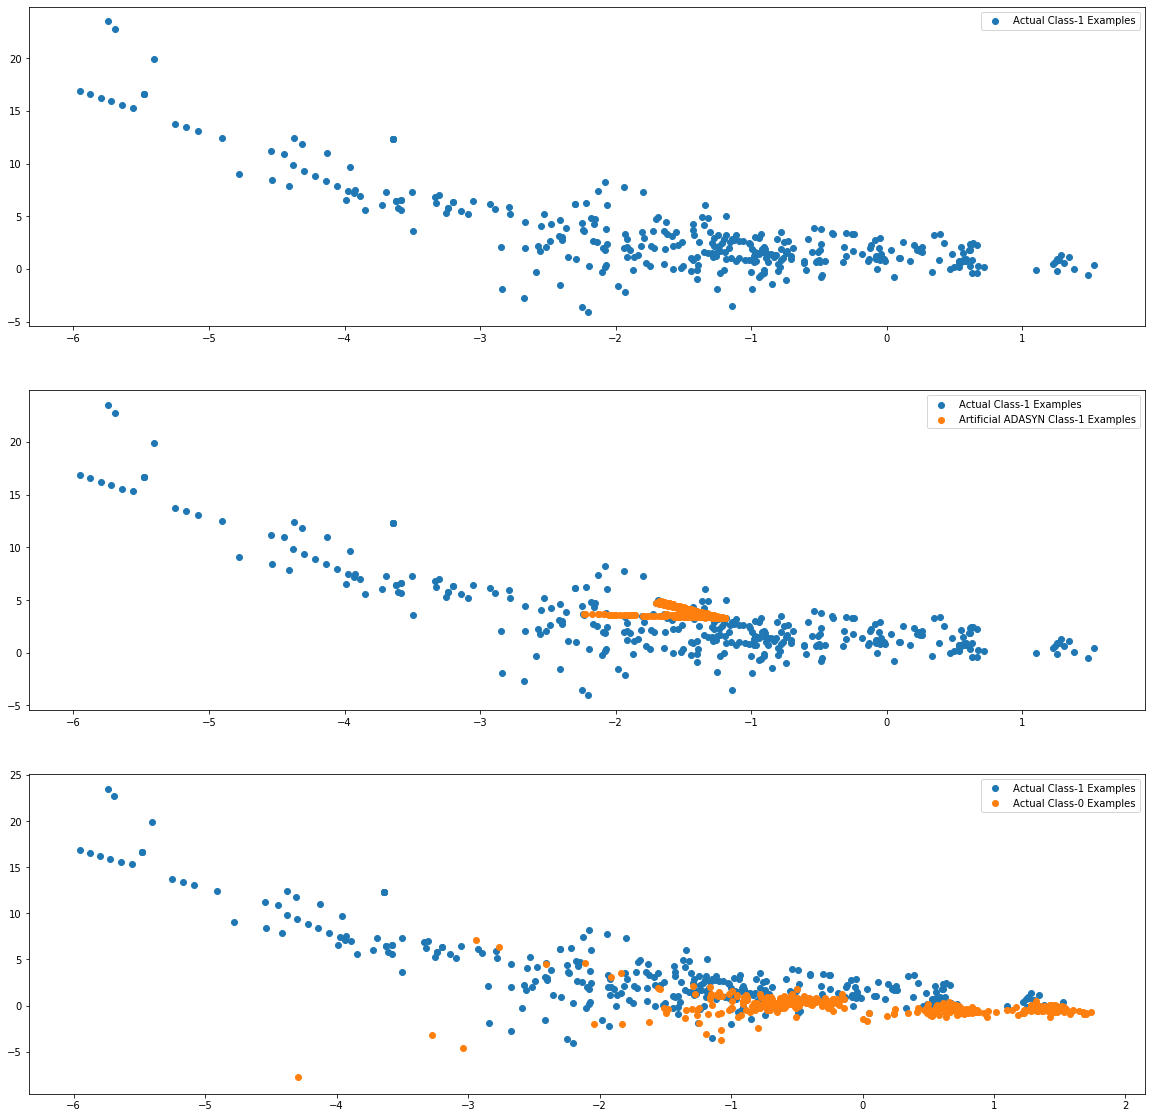

In [25]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = ada.fit_resample(X_test, y_test)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression with ADASYN

In [26]:
# Logistic Regression
from sklearn import linear_model #import the package
import warnings
warnings.filterwarnings("ignore")

num_C = [0.01,0.1,20,30,100] 
from sklearn.metrics import roc_auc_score
for i in num_C:

    lr_1 = LogisticRegression(C=i,penalty='l2', solver='lbfgs', 
                          max_iter=1000,
                          random_state=1000, tol=0.0001, verbose=0)
    lr_1.fit(X_train_adasyn, y_train_adasyn)
    y_pred_l1 = lr_1.predict(X_test)
    print("C",i,"ROC AUC: ",roc_auc_score(y_test, y_pred_l1))

C 0.01 ROC AUC:  0.9139079316141278
C 0.1 ROC AUC:  0.9134155229149075
C 20 ROC AUC:  0.9134213849232314
C 30 ROC AUC:  0.9134213849232314
C 100 ROC AUC:  0.9134213849232314


### Random Forest With ADASYN

In [19]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

random_grid = {'max_depth': [2,6,10,14],
          'n_estimators': [50,100,150]}

#perform hyperparameter tuning

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring= 'roc_auc',
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,return_train_score=True)
# +
rf_random.fit(X_train_adasyn, y_train_adasyn)

print(rf_random.best_params_)
#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed: 11.2min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 12.8min finished


{'n_estimators': 100, 'max_depth': 14}


##### Optimal Model: Random Forest with ADASYN

In [26]:
clf2 = RandomForestClassifier(n_jobs=-1,max_depth=14,n_estimators=100)  
clf2.fit(X_train_adasyn, y_train_adasyn)
y_pred_un = clf2.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_un[:,1])) 

0.9763744429111684


### XGBoost with ADASYN 

In [21]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN
from imblearn.over_sampling import ADASYN #- import the packages
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#perform hyperparameter tuning
param_grid = {'learning_rate': [0.2, 0.6], 
          'subsample': [0.3, 0.6, 0.9],
          'max_depth' : [2,3,5]
          }          

# specify model
xgb_model_ad = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
model_cv_ad = GridSearchCV(estimator = xgb_model_ad, 
                          param_grid = param_grid, 
                          scoring= 'roc_auc', 
                          cv = StratifiedKFold(n_splits=5, shuffle=True), 
                          verbose = 2,
                          n_jobs=-1,
                          return_train_score=True)  
model_cv_ad.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
y_pred_ad = model_cv_ad.predict(X_test_adasyn)
print(roc_auc_score(y_test_adasyn, y_pred_ad))
#print the optimum value of hyperparameters
print(model_cv_ad.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 72.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 195.0min finished


0.8390932178717856
{'learning_rate': 0.6, 'max_depth': 5, 'subsample': 0.6}


##### Optimal Model: XGBoost with ADASYN

In [38]:
clf_ad = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.6, subsample = 0.6,objective = 'binary:logistic')  #initialise the model with optimum hyperparameters
clf_ad.fit(X_train_adasyn, y_train_adasyn)
y_pred_ad_f = clf_ad.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_ad_f[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.974127550963825


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [88]:
# perform the best oversampling method on X_train & y_train

clf_final = XGBClassifier(max_depth=5, n_estimators=200,learning_rate = 0.6, subsample = 0.6,objective = 'binary:logistic')   #initialise the model with optimum hyperparameters
clf_final.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset
y_pred_final = clf_final.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_final[:,1])) #print the evaluation score on the X_test by choosing the best evaluation metric

0.974127550963825


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


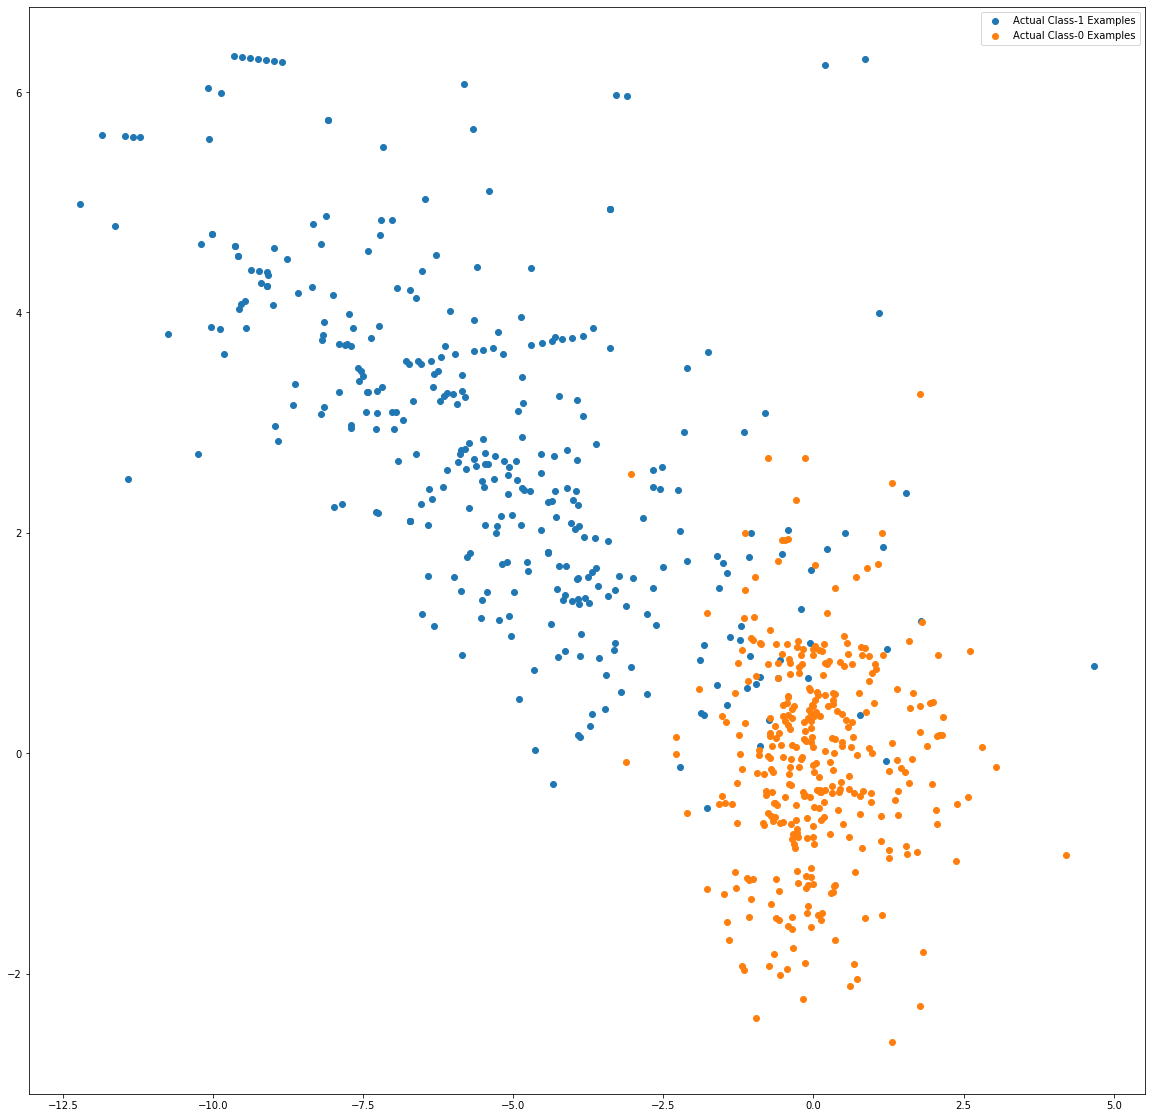

In [89]:
var_imp = []
for i in clf_final.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_final.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_final.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_final.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [90]:
#Let's first form a function to get all evaluation metrics at one time

from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve, f1_score

def metrics_dataframe(actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    specificity = TN/float(TN+FP)
    accuracy = accuracy_score(actual, predicted)
    F1_score = f1_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    false_positive_rate = FP/float(TN+FP)
    positive_predictive_value = TP/float(TP+FP)
    negative_predictive_value = TN/float(TN+ FN)
    
    return_data = {'Metric': ['Specificity', 'Accuracy', 'F1 Score','Precision', 'Sensitivity/Recall', 'False Positive Rate',
                             'Positive Predictive Value', 'Negative Predictive Value'],
                   'Score': [specificity, accuracy,F1_score, precision, recall, false_positive_rate, positive_predictive_value,
                            negative_predictive_value]}
    return pd.DataFrame.from_dict(return_data)

In [91]:
#Predicting the probabilities
y_pred_final = pd.DataFrame({'converted':y_test,'converted_probability':y_pred_final[:,1]})
y_pred_final.head()

,converted,converted_probability
186882,0,7.323756e-11
165754,0,5.304494e-11
235285,0,9.902174e-09
101271,0,2.643939e-07
5832,0,4.788030e-06


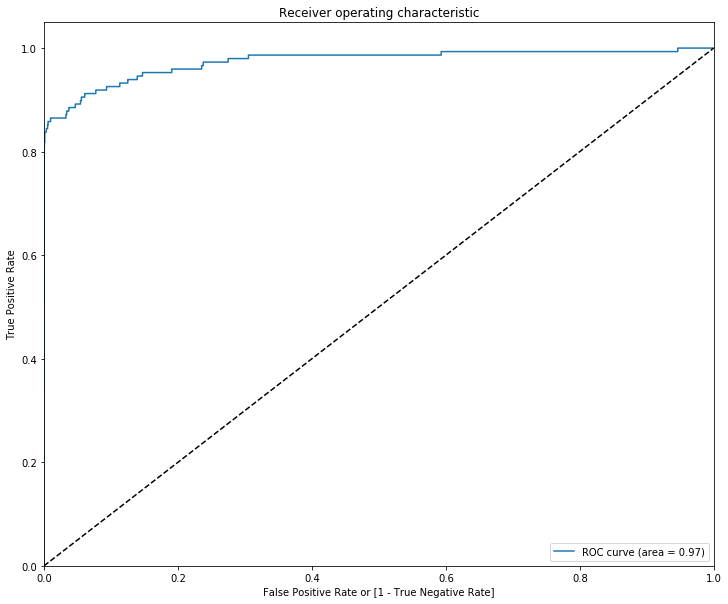

In [92]:
#### Print the FPR,TPR & select the best threshold from the roc curve

#Defining the function for plotting the ROC curve
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = roc_curve(y_pred_final.converted,
                                         y_pred_final.converted_probability, drop_intermediate=False )

#PLotting the ROC curve
plt.figure(figsize=(12, 10))
draw_roc(y_pred_final.converted, y_pred_final.converted_probability)

In [93]:
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.0005550518


In [94]:
predicted_final_train = y_pred_final.converted_probability.map( lambda x: 1 if x > threshold else 0)

In [95]:
print(confusion_matrix(y_pred_final.converted, predicted_final_train))
metrics_dataframe(y_pred_final.converted, predicted_final_train)

[[84466   829]
 [   21   127]]


,Metric,Score
0,Specificity,0.990281
1,Accuracy,0.990052
2,F1 Score,0.230072
3,Precision,0.132845
4,Sensitivity/Recall,0.858108
5,False Positive Rate,0.009719
6,Positive Predictive Value,0.132845
7,Negative Predictive Value,0.999751


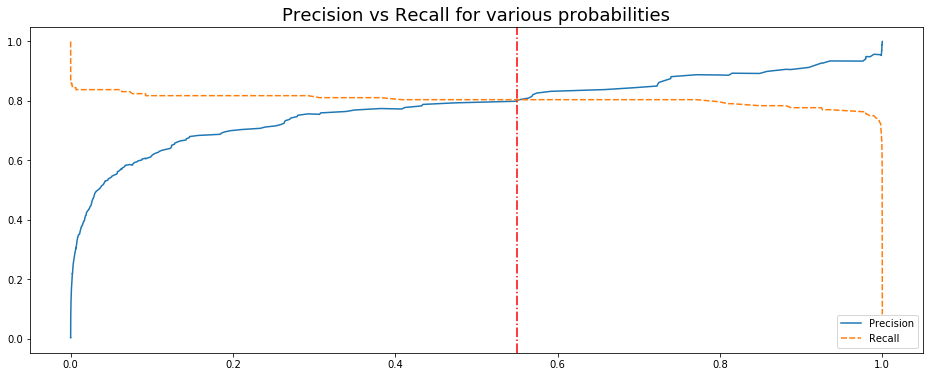

In [61]:
# Probability Distribution of Precision-Recall Trade-off
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred_final.converted, y_pred_final.converted_probability)

cutoff_df = pd.DataFrame({'Precision': pd.Series(p[:-1], index=thresholds),
              'Recall':pd.Series(r[:-1], index=thresholds)})
cutoff_df.head()
#Plotting the trade-off
plt.figure(figsize=(16, 6))
sns.lineplot(data=cutoff_df)
plt.title('Precision vs Recall for various probabilities', fontsize=18)
plt.axvline(0.55, color='r', linestyle='-.')

In [62]:
#Evaluating the metrics on optimum threshold
threshold=0.55
predicted_final_train = y_pred_final.converted_probability.map( lambda x: 1 if x > threshold else 0)
print(confusion_matrix(y_pred_final.converted, predicted_final_train))
metrics_dataframe(y_pred_final.converted, predicted_final_train)

[[85266    29]
 [   29   119]]


,Metric,Score
0,Specificity,0.999660
1,Accuracy,0.999321
2,F1 Score,0.804054
3,Precision,0.804054
4,Sensitivity/Recall,0.804054
5,False Positive Rate,0.000340
6,Positive Predictive Value,0.804054
7,Negative Predictive Value,0.999660


### Conclusion-1:
 * Out of `148` fraud transaction in test, Our Model is able correctly identify `127` samples and missed `21` samples while considering 0.00055 as our threshold.
 * We can increase the the fraud detection rate by decreasing the threshold but that will depend on the client as it will impact false negatives score as well.
 * For this scenario we are keeping a low threshold so that we can correctly identify fraud transactions. On the negative side we are identifying some of the valid transactions as fraud which will impact customers mindset.
 * After finding the optimum threshold from the Precision-Recall curve, we observe that there is an increase in Precision and decrease in Recall though we are identifying lesser frauds but False positive count has decreased significantly.
 * PFB  some Stats we got from all the models we have trained 

__We will now try our second approach of identifying frauds by building the model using Neural Networks with SMOTE and ADASYN balanced data__

### Nueral Network with SMOTE

In [107]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

NN_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [108]:
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 29)                870       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________


In [115]:
NN_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [116]:
NN_model.fit(X_train_smote, y_train_smote, validation_split=0.3, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
11146/11146 - 7s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 2.5113e-04 - val_accuracy: 1.0000
Epoch 2/20
11146/11146 - 7s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 3/20
11146/11146 - 7s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 4.5651e-04 - val_accuracy: 1.0000
Epoch 4/20
11146/11146 - 7s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.5383e-04 - val_accuracy: 1.0000
Epoch 5/20
11146/11146 - 7s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.0490e-04 - val_accuracy: 1.0000
Epoch 6/20
11146/11146 - 7s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0022 - val_accuracy: 0.9991
Epoch 7/20
11146/11146 - 7s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.4650e-04 - val_accuracy: 1.0000
Epoch 8/20
11146/11146 - 7s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.5603e-04 - val_accuracy: 1.0000
Epoch 9/20
11146/11146 - 7s - loss: 8.9767e-04 - accuracy: 0.9998 - val_loss: 2.1645e-04 - val_accuracy: 1.0000
Epoch 10/20
11146/11146 - 7s - l

In [117]:
y_pred_NN = NN_model.predict(X_test, batch_size=200, verbose=0)

In [124]:
y_pred_NNC = NN_model.predict_classes(X_test, batch_size=200, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [126]:
confusion_matrix(y_test,y_pred_NNC)


array([[85262,    33],
       [   35,   113]], dtype=int64)

In [127]:
metrics_dataframe(y_test,y_pred_NNC)

TP 113 FP 33
0.7687074829931972 0.773972602739726 0.7635135135135135


,Metric,Score
0,Specificity,0.999613
1,Accuracy,0.999204
2,F1 Score,0.768707
3,Precision,0.773973
4,Sensitivity/Recall,0.763514
5,False Positive Rate,0.000387
6,Positive Predictive Value,0.773973
7,Negative Predictive Value,0.999590


### Neural Network With ADASYN Data 

In [133]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

NN_model_ada = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [134]:
NN_model_ada.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                960       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________


In [136]:
NN_model_ada.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
NN_model_ada.fit(X_train_adasyn, y_train_adasyn, validation_split=0.3, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
11146/11146 - 7s - loss: 0.0092 - accuracy: 0.9981 - val_loss: 0.4884 - val_accuracy: 0.9276
Epoch 2/20
11146/11146 - 7s - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.6155 - val_accuracy: 0.9139
Epoch 3/20
11146/11146 - 7s - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.3419 - val_accuracy: 0.9387
Epoch 4/20
11146/11146 - 7s - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.2367 - val_accuracy: 0.9301
Epoch 5/20
11146/11146 - 7s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.4737 - val_accuracy: 0.9127
Epoch 6/20
11146/11146 - 7s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.1625 - val_accuracy: 0.9563
Epoch 7/20
11146/11146 - 7s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.4807 - val_accuracy: 0.8968
Epoch 8/20
11146/11146 - 7s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.4834 - val_accuracy: 0.9066
Epoch 9/20
11146/11146 - 7s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1904 - val_accuracy: 0.9563
Epoch 10/20
11146/11146 - 7s - loss: 0.0019 - accuracy: 0.9995 -

In [137]:
#Predicting on test data and evaluating the metrics
y_pred_NN_ada = NN_model_ada.predict(X_test, batch_size=200, verbose=0)
y_pred_NN_adaC = NN_model_ada.predict_classes(X_test, batch_size=200, verbose=0)

print(confusion_matrix(y_test,y_pred_NN_adaC))
metrics_dataframe(y_test,y_pred_NN_adaC)

[[85215    80]
 [   31   117]]
TP 117 FP 80
0.6782608695652175 0.5939086294416244 0.7905405405405406


,Metric,Score
0,Specificity,0.999062
1,Accuracy,0.998701
2,F1 Score,0.678261
3,Precision,0.593909
4,Sensitivity/Recall,0.790541
5,False Positive Rate,0.000938
6,Positive Predictive Value,0.593909
7,Negative Predictive Value,0.999636


## Conclusion 2:

- We got relatively better models using Neural Network. Using the SMOTE balanced data, we were able to achieve F1-score `0.7687` and with ADASYN data, we got `0.6782` F1-score.
- Also, the computational time required for Neural Network models was very less compared to the ensemble models like Random Forest and XGBoost.